<a href="https://colab.research.google.com/github/Sathyadev75/DS_PROJECTS_PRAKASH/blob/main/FINAL_of_CUSTOMER_INSURANCE%2BPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""Guvi Datathon 1.0
Customer Conversion Prediction
Problem Statement
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.
Data
The historical sales data is available as a compressed file here.
Data
Features:
● age (numeric)
● job : type of job
● marital : marital status
● educational_qual : education status
● call_type : contact communication type
● day: last contact day of the month (numeric)
● mon: last contact month of year
● dur: last contact duration, in seconds (numeric)
● num_calls: number of contacts performed during this
campaign and for this client
● prev_outcome: outcome of the previous marketing
campaign (categorical:
"unknown","other","failure","success")
Output variable (desired target):
● y - has the client subscribed to the insurance?
Minimum Requirements
It is not sufficient to just fit a model - the model must be
analysed to find the important factors that contribute towards
the price. AUROC must be used as a metric to evaluate the
performance of the models"""

In [177]:
#required packages

import pandas as pd
import numpy as np
import statistics as st


import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
#IMPORTNG DATAFRAME

df=pd.read_csv("/content/drive/MyDrive/DATA SCIENCE PROJECTS/CUSTOMER INSURANCE PREDICTION/Customer Conversion Prediction - Customer Conversion Prediction.csv")

df1=df.head(4)
df1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no


In [180]:
#checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
dur,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
num_calls,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


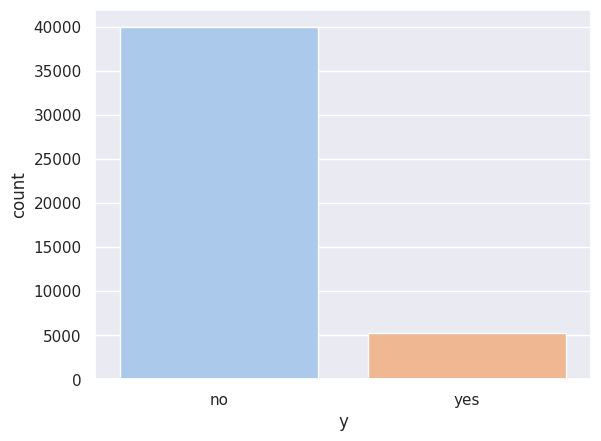

In [182]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='y')
plt.show()

**DATA CLEANING**

In [183]:
df1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no


In [184]:
#classification problem 

print(df.shape)
print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')


df.columns


(45211, 11)
➤ The DataFrame(df) contains 45211 rows and 11 columns.


Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [185]:
list_columns=df.columns
for column in list_columns:
  print(df[column].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939


since null values are present in string form "unknown" we need to replace it to null values and then filled not to loose th huge amount of values

In [186]:
df.columns
#converting unknown values to None in which it will able to filled by numpy

df["prev_outcome"]=df["prev_outcome"].replace({"unknown":None})

df["job"]=df["job"].replace({"unknown":None})

df["education_qual"]=df["education_qual"].replace({"unknown":None})

df["call_type"]=df["call_type"].replace({"unknown":None})



In [187]:
df.isnull().sum()



age                   0
job                 288
marital               0
education_qual     1857
call_type         13020
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36959
y                     0
dtype: int64

In [188]:
#filling missing values using most frquent values in respective columns



df["job"]=df["job"].replace({None:st.mode(df["job"])})

df["education_qual"]=df["education_qual"].replace({None:st.mode(df["education_qual"])})

df["call_type"]=df["call_type"].replace({None:st.mode(df["call_type"])})


#st.mode(df["prev_outcome"])    #since mode is None we select other than this

print(df["prev_outcome"].value_counts())  #most occuriing element is elected other than None

#from the count we get "failure" is most occured one  4901

df["prev_outcome"]=df["prev_outcome"].replace({None:"failure"})



failure    4901
other      1840
success    1511
Name: prev_outcome, dtype: int64


In [189]:
list=df.columns
  

In [190]:
for column in list:
  print(df[column].unique()) 

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'primary']
['cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[ 261  151   76 ... 1298 1246 1556]
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
['failure' 'other' 'success']
['no' 'yes']


**verification of null value presence**

In [191]:
df.isnull().sum()



age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [192]:
df=df.drop_duplicates()


In [193]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

DATA VISUALIZATION

CATEGORICAL VARIABLE


In [194]:
#since day in month is also a categorical variable  
# a distinct category within the range of possible values

df["day"]=df["day"].astype(str)

In [195]:
list_cat_vars=[column for column in df.columns if df[column].dtype==object]
print("categorical_columns: \n",list_cat_vars)


categorical_columns: 
 ['job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'prev_outcome', 'y']


In [196]:
for i in list_cat_vars:
  print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


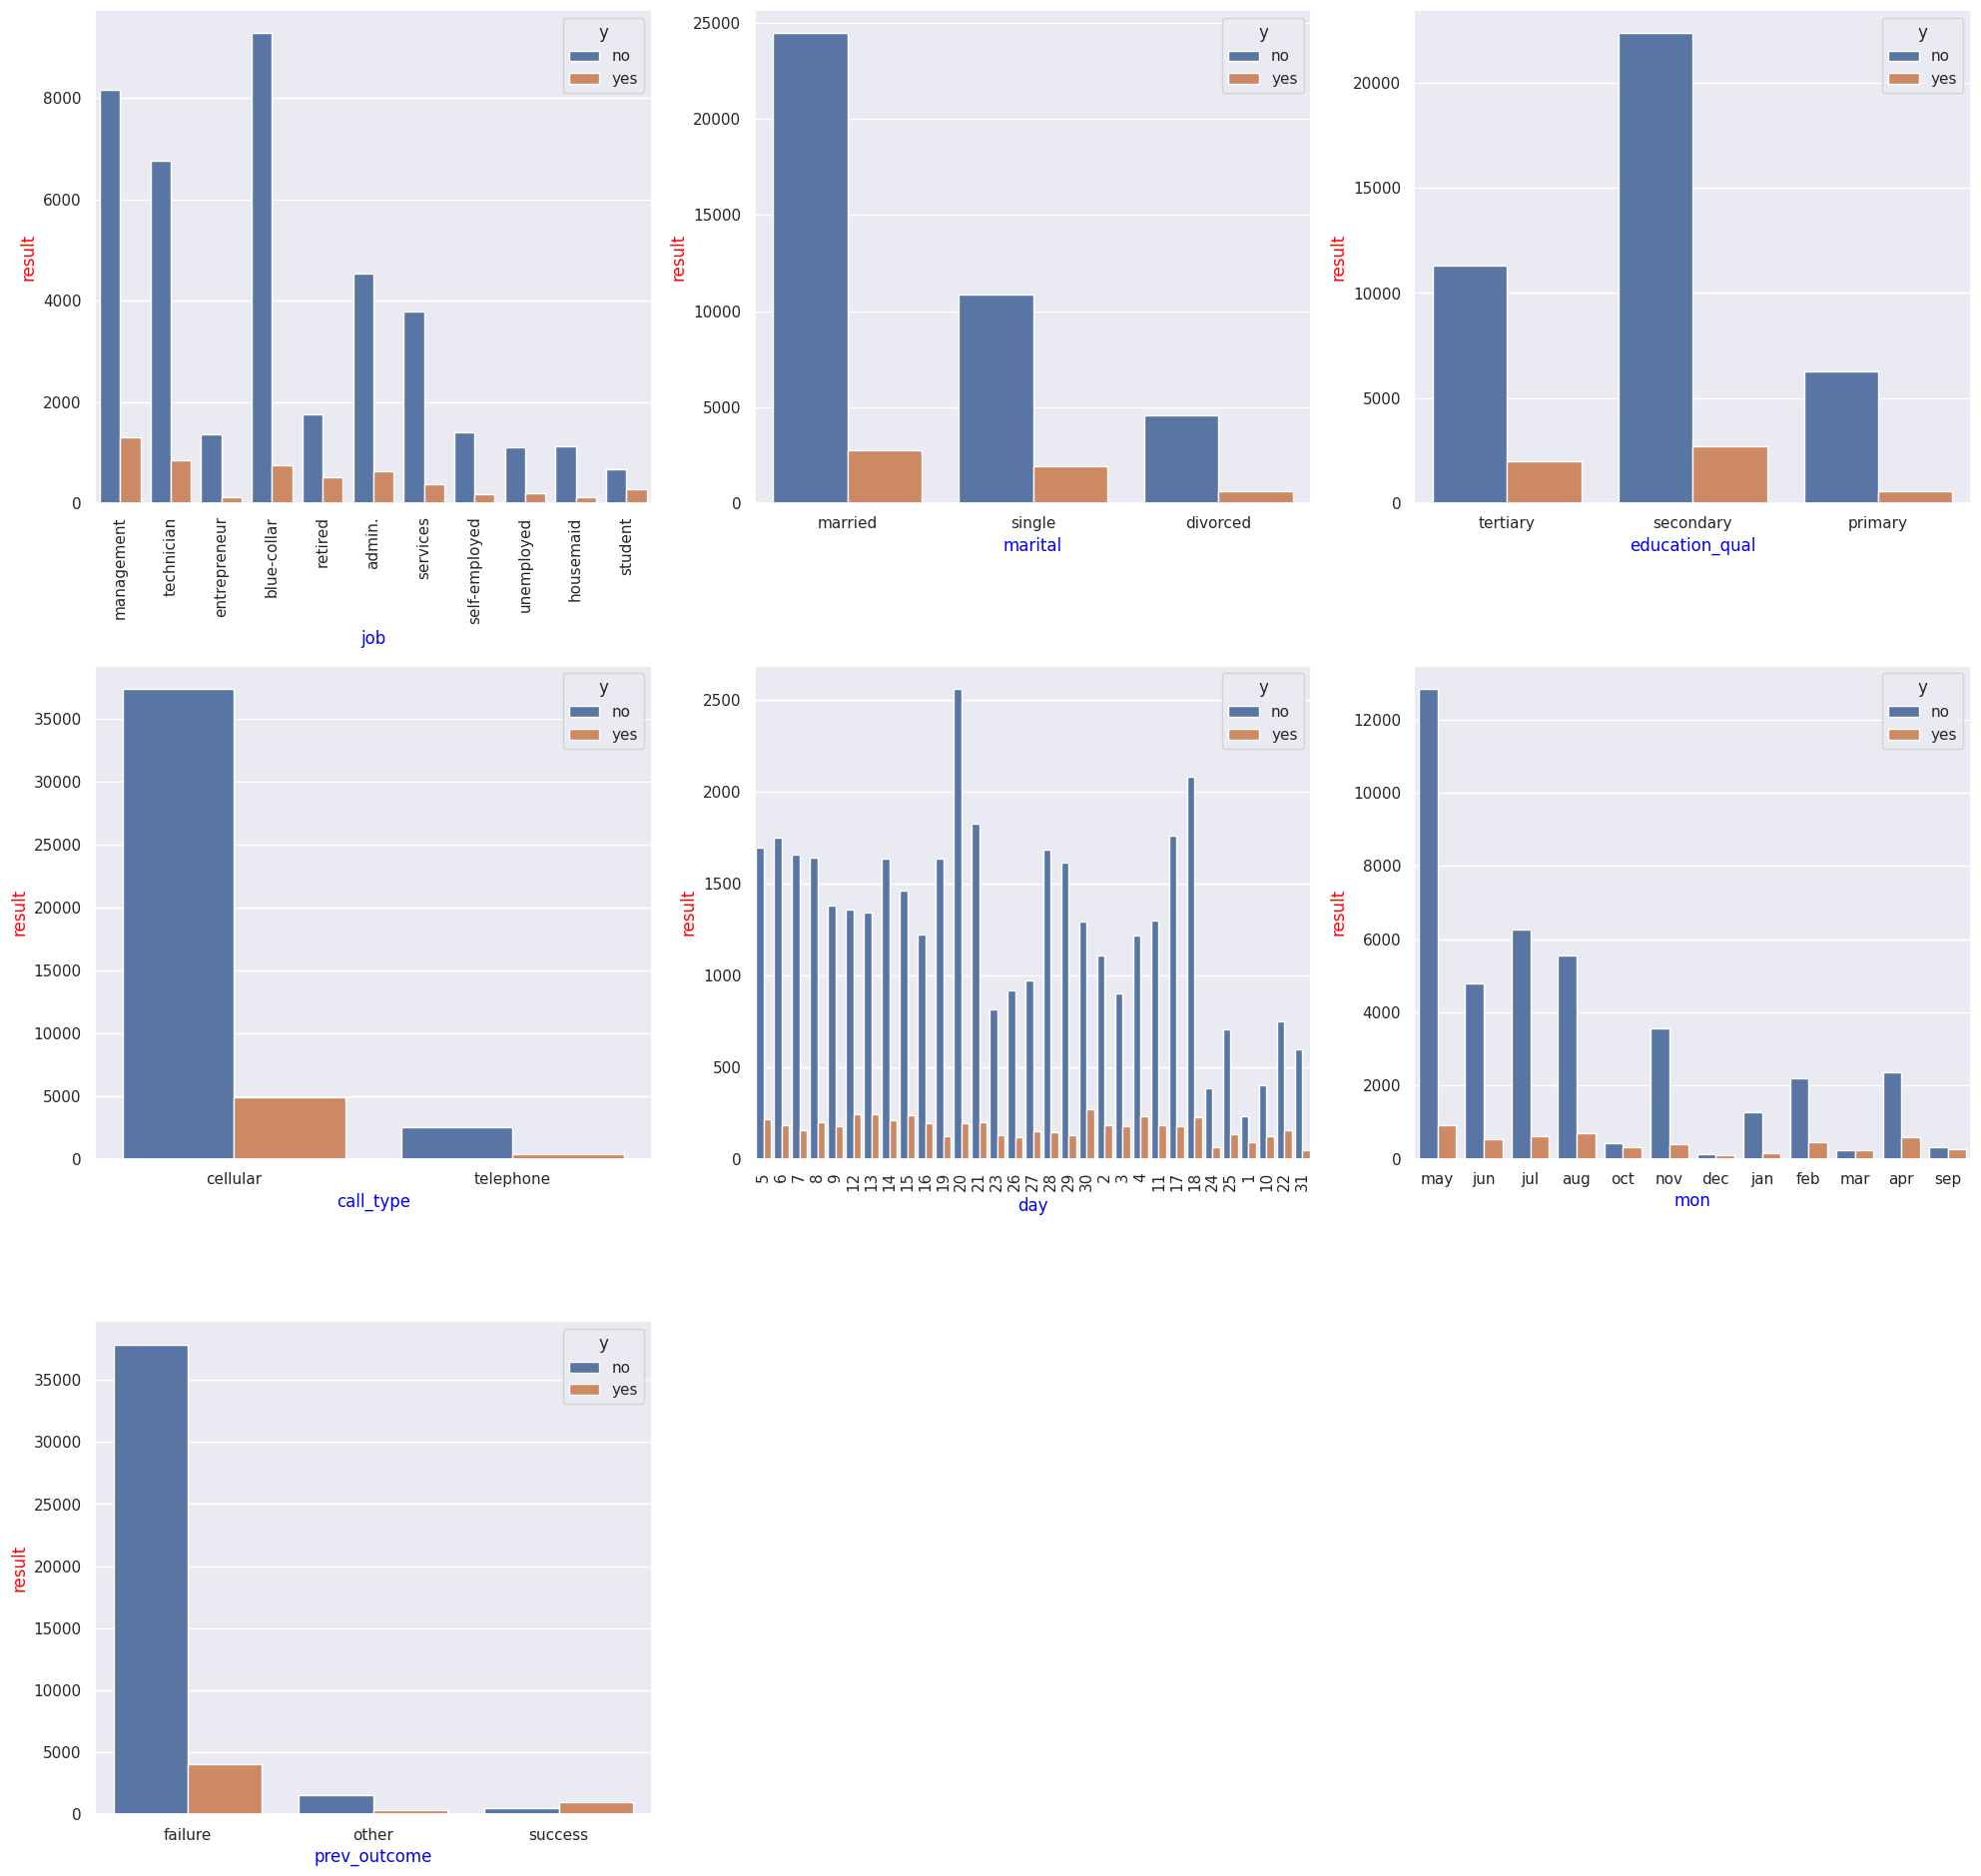

In [197]:
#job,marital,education_qual,call_type,prev_outcome mon
#list_cat_vars

#for categorical columns
plots=431
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))
list_cat_vars.remove("y")

for cat_column in list_cat_vars:

      plt.subplot(plots)
      sns.set(style="darkgrid")
      sns.countplot(x=cat_column,hue="y",data=df)
      plt.xlabel(cat_column, color="blue")
      plt.ylabel("result", color="red")
      plots+=1
      if cat_column=="day":
          plt.xticks(rotation=90)
      if cat_column=="num_calls":
          plt.xlim(0,4)
      if cat_column=="job":
          plt.xticks(rotation=90)
      if cat_column=="job":
          plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [198]:
#LIST OF CATEGORICAL COLUMNS
list_cat_vars


['job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'prev_outcome']

from the plots we can understand that change in categorical variable has some amount of impact on target variable

CONTINOUS VARIABLE VS TARGET VARIABLE

In [199]:
#LIST OF CONTINOUS COLUMNS

list_con_vars=[column for column in df.columns if df[column].dtype=="int64"]
print(list_con_vars)

['age', 'dur', 'num_calls']


**REMOVING OUTLIERS**

In [200]:
list_con_vars

['age', 'dur', 'num_calls']

<Axes: xlabel='num_calls', ylabel='count'>

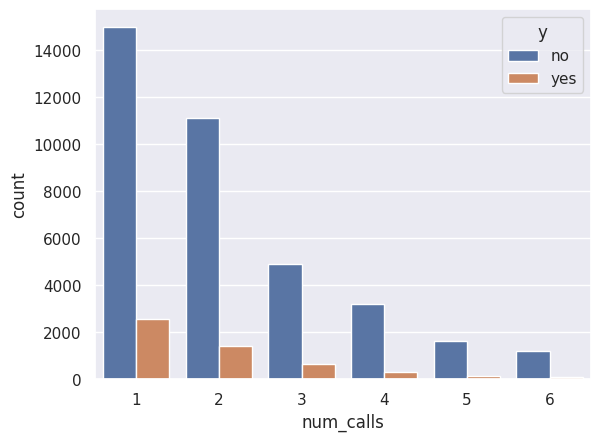

In [201]:
import seaborn as sns

# Calculate the IQR and define the outlier threshold
Q1 = df["num_calls"].quantile(0.25)
Q3 = df["num_calls"].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

# Filter the data to remove outliers
df_filtered = df[(df["num_calls"] >= Q1 - threshold) & (df["num_calls"] <= Q3 + threshold)]

# Draw a countplot to visualize the filtered data
sns.countplot(x="num_calls", hue="y", data=df_filtered)

In [202]:
list_con_vars.remove("num_calls")

(80.0, 100.0)

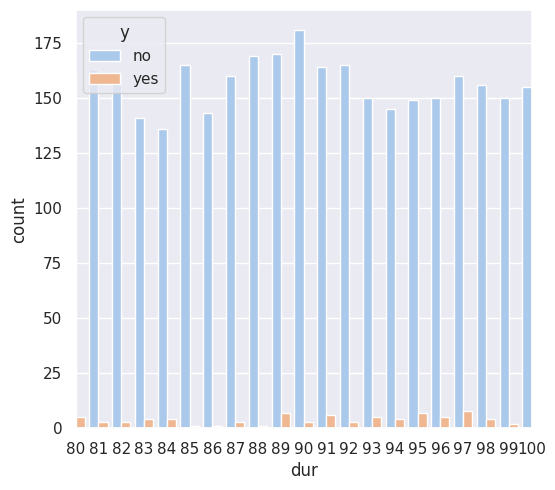

In [203]:
#age,dur
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))
plt.subplot(434)

sns.countplot(x="dur", hue="y",data=df)
plt.xlim(80,100)


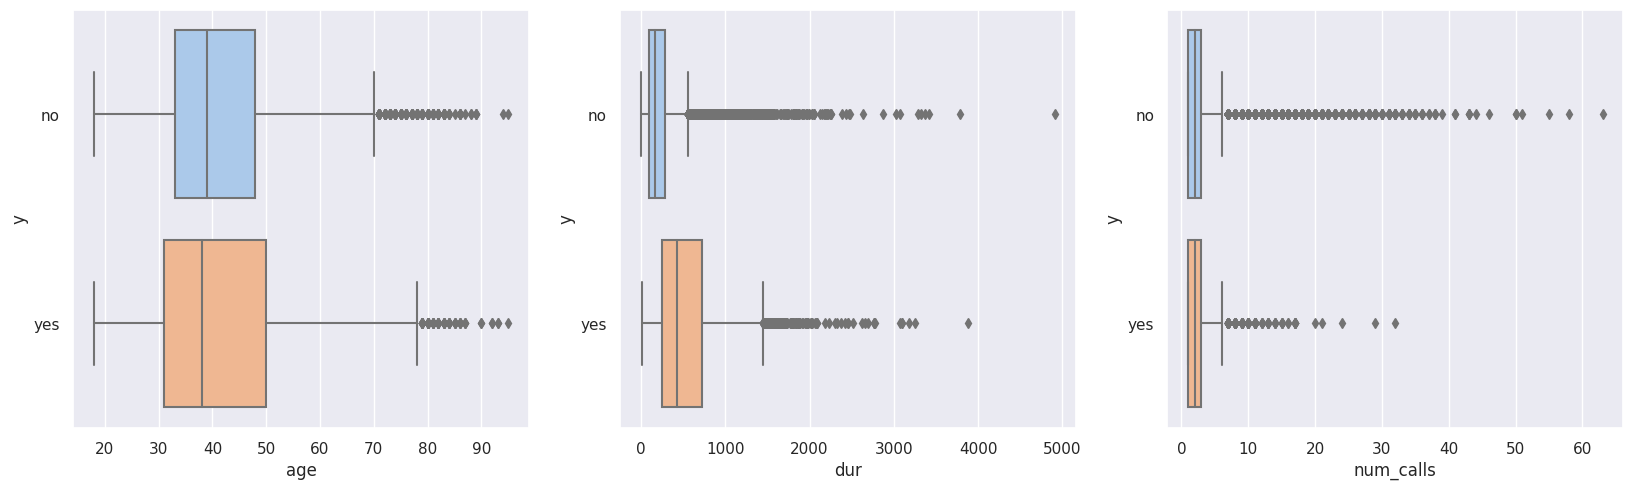

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and palette
sns.set_theme(style='darkgrid',palette='pastel')

# Create a new figure with a size of 20 inches by 25 inches
plt.figure(figsize=(20,25))

# Create first subplot with boxplot of "age" variable
plt.subplot(4, 3, 4)
sns.boxplot(x="age", y="y", data=df)

# Create second subplot with boxplot of "dur" variable
plt.subplot(4, 3,5)
sns.boxplot(x="dur", y="y", data=df)

# Create third subplot with boxplot of "num_calls" variable
plt.subplot(4, 3, 6)
sns.boxplot(x="num_calls", y="y", data=df)

# Show the plot
plt.show()


In [205]:
df["age"].unique()
df1=df


In [206]:
df.columns


Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [207]:
for i in df.columns:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "age" is divided into "77" categories.
Column "job" is divided into "11" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "3" categories.
Column "call_type" is divided into "2" categories.
Column "day" is divided into "31" categories.
Column "mon" is divided into "12" categories.
Column "dur" is divided into "1573" categories.
Column "num_calls" is divided into "48" categories.
Column "prev_outcome" is divided into "3" categories.
Column "y" is divided into "2" categories.


In [208]:
# for column " age"
df['age'].value_counts()

32    2083
31    1995
33    1971
34    1929
35    1893
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [209]:
# for column "job"
df['job'].value_counts()

blue-collar      10016
management        9456
technician        7596
admin.            5170
services          4151
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [210]:
# for column "marital"
df['marital'].value_counts()

married     27207
single      12786
divorced     5207
Name: marital, dtype: int64

In [211]:
# for column "education_qual"
df['education_qual'].value_counts()

secondary    25053
tertiary     13298
primary       6849
Name: education_qual, dtype: int64

In [212]:
# for column "call_type"
df['call_type'].value_counts()

cellular     42294
telephone     2906
Name: call_type, dtype: int64

In [213]:
# for column "job"
df['day'].value_counts()

20    2752
18    2307
21    2026
17    1938
6     1931
5     1910
14    1848
8     1840
28    1829
7     1816
19    1756
29    1745
15    1702
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [214]:
# for column "mon"
df['mon'].value_counts()

may    13761
jul     6894
aug     6245
jun     5339
nov     3970
apr     2931
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [215]:
# for column "dur"
df['dur'].value_counts()
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [216]:
# for column "num_calls"
df['num_calls'].value_counts()

1     17538
2     12502
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [217]:
# for column "prev_outcome"
df['prev_outcome'].value_counts()

failure    41849
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [218]:
# for column "y"
df['y'].value_counts()
df1=df
df1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [219]:
import pandas as pd
from scipy.stats import chi2_contingency

# create a pandas dataframe with the categorical variables


# create a contingency table of the two variables
for column in list_cat_vars:
      contingency_tab = pd.crosstab(df[column], df1['y'])

      # calculate the G-test statistic and p-value
      g_stat, p_val, dof, expected_freq = chi2_contingency(contingency_tab)

      # print the results
      print(f"G-Test Statistic for {column}: {g_stat:.2f}")
      print(f"P-value (G-Test) for {column}: {p_val:.4f}")
      print("\n")

"""
In this case, the G-test statistic is 4341.70, which is a high value 
and suggests a significant association between 'prev_outcome' and 'y' variables. 
The p-value for the G-test is 0.0000, which is less than the typical significance level of 0.05
. This indicates that the
 observed association is statistically significant
 , and we can reject the null hypothesis of independence between the two variables."""


G-Test Statistic for job: 829.99
P-value (G-Test) for job: 0.0000


G-Test Statistic for marital: 196.56
P-value (G-Test) for marital: 0.0000


G-Test Statistic for education_qual: 223.80
P-value (G-Test) for education_qual: 0.0000


G-Test Statistic for call_type: 8.71
P-value (G-Test) for call_type: 0.0032


G-Test Statistic for day: 573.65
P-value (G-Test) for day: 0.0000


G-Test Statistic for mon: 3060.85
P-value (G-Test) for mon: 0.0000


G-Test Statistic for prev_outcome: 4340.30
P-value (G-Test) for prev_outcome: 0.0000




"\nIn this case, the G-test statistic is 4341.70, which is a high value \nand suggests a significant association between 'prev_outcome' and 'y' variables. \nThe p-value for the G-test is 0.0000, which is less than the typical significance level of 0.05\n. This indicates that the\n observed association is statistically significant\n , and we can reject the null hypothesis of independence between the two variables."

 null hypothesis: there is no association between two columns

The p value is less than 0.05 it reject null hypothesis

It means that there is strong evidence that there is a significant association between the columns 

the variables with higher G-test statistic values (prev_outcome, mon, day, education_qual) have a stronger association with the outcome than the variables with lower values (call_type, job, marital).

In [220]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway

#df1["y"]=df1["y"].replace({"1":"yes","0":"no"})
# create a pandas dataframe with the continuous and categorical variables
for column in list_con_vars:
          # separate the continuous variable by the categories in the categorical variable
          group_A = df.loc[df['y'] == 'yes', column]
          group_B = df.loc[df['y'] == 'no', column]

          # calculate the t-test statistic and p-value for the two groups
          t_stat, p_val = ttest_ind(group_A, group_B)

          # print the results
          print(f"T-Test Statistic: {t_stat:.2f}")
          print(f"P-value (T-Test): {p_val:.4f}")

          # calculate the ANOVA F-statistic and p-value for the two groups
          f_stat, p_val = f_oneway(group_A, group_B)

          # print the results
          print(f"ANOVA F-Statistic for {column}: {f_stat:.2f}")
          print(f"P-value (ANOVA) for {column}: {p_val:.4f}")
          print("\n")


T-Test Statistic: 5.34
P-value (T-Test): 0.0000
ANOVA F-Statistic for age: 28.48
P-value (ANOVA) for age: 0.0000


T-Test Statistic: 91.27
P-value (T-Test): 0.0000
ANOVA F-Statistic for dur: 8330.53
P-value (ANOVA) for dur: 0.0000




 null hypothesis: there is no association between two columns

The p value is less than 0.05 it reject null hypothesis

It means that there is strong evidence that there is a significant association between the columns

Based on the provided T-test and ANOVA results, the most important factor impacting the outcome variable appears to be the 'dur' variable, with the highest F-statistic value (8330.53) and a very low p-value (0.0000), indicating a strong association between 'dur' and the outcome variable

In [221]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a LabelEncoder object
le = LabelEncoder()
df1=pd.DataFrame()
# Fit and transform the "color" column of the DataFrame
df['job_encoded'] = le.fit_transform(df['job'])
df['marital_encoded'] = le.fit_transform(df['marital'])
df['education_qual_encoded'] = le.fit_transform(df['education_qual'])
df['call_type_encoded'] = le.fit_transform(df['call_type'])
df['mon_encoded'] = le.fit_transform(df['mon'])
df['prev_outcome_encoded'] = le.fit_transform(df['prev_outcome'])
df["y_encoded"]=le.fit_transform(df["y"])
df["day_encoded"]=le.fit_transform(df["day"])
# Print the resulting DataFrame


df.drop(columns=['job', 'marital', 'education_qual', 'call_type','prev_outcome',"mon","y","day"],inplace=True)


df.columns


Index(['age', 'dur', 'num_calls', 'job_encoded', 'marital_encoded',
       'education_qual_encoded', 'call_type_encoded', 'mon_encoded',
       'prev_outcome_encoded', 'y_encoded', 'day_encoded'],
      dtype='object')

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your dataset into a pandas DataFrame or Numpy array
X=df.drop(columns="y_encoded",axis=1)
y=df["y_encoded"]
# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model object and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusion_matrix)
print(model.score(X,y))


Accuracy: 0.8966814159292036
Confusion matrix: [[7788  177]
 [ 757  318]]
0.8956858407079646


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [223]:
from sklearn.metrics import roc_auc_score


# Compute AUROC score
auroc = roc_auc_score(y_test, y_pred)

print('AUROC: %.3f' % auroc)



AUROC: 0.637
